## Medial Axis


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from skimage.morphology import medial_axis
from skimage.util import invert
from planning import a_star
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

In [3]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


Starting and goal positions in *(north, east)*.

In [4]:
start_ne = (25,  100)
goal_ne = (650, 500)

In [5]:
# Static drone altitude (meters)
drone_altitude = 5
safety_distance = 2

In [6]:
grid = create_grid(data, drone_altitude, safety_distance)
skeleton = medial_axis(invert(grid))

print(skeleton)
print(~skeleton)

[[False False False ...  True  True  True]
 [False False False ... False False  True]
 [False False False ... False False  True]
 ...
 [False False False ... False False  True]
 [False False False ... False False  True]
 [ True  True  True ...  True  True False]]
[[ True  True  True ... False False False]
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True False]
 [False False False ... False False  True]]


Plot the edges on top of the grid along with start and goal locations.

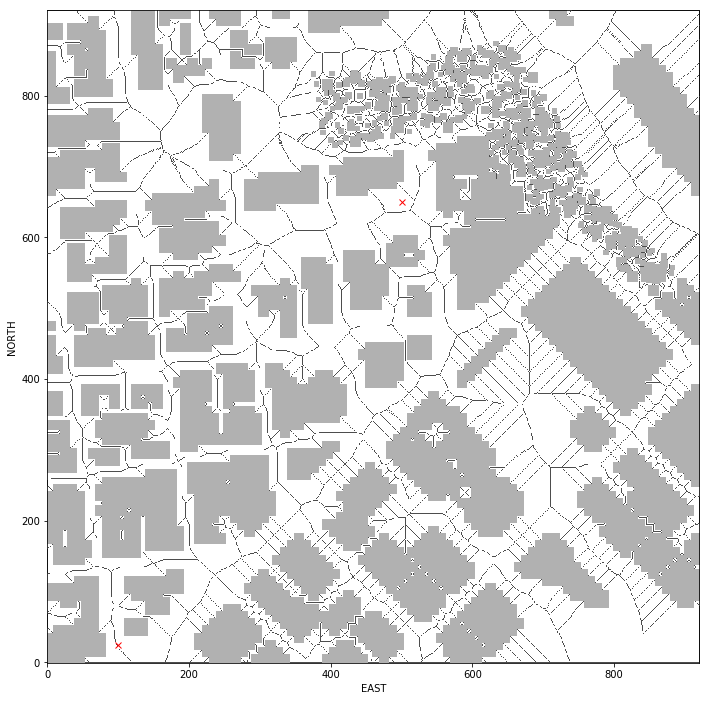

In [7]:
# equivalent to
# plt.imshow(np.flip(grid, 0))

plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
    
plt.plot(start_ne[1], start_ne[0], 'rx')
plt.plot(goal_ne[1], goal_ne[0], 'rx')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [8]:
# TODO: Your start and goal location defined above
# will not necessarily be on the skeleton so you
# must first identify the nearest cell on the 
# skeleton to start and goal

def find_start_goal(skel, start, goal):
    # TODO: find start and goal on skeleton
    # Some useful functions might be:
        # np.nonzero()
        # np.transpose()
        # np.linalg.norm()
        # np.argmin()
    skel_1_idices= np.transpose(np.nonzero(skel))

    start_idx = np.argmin(np.linalg.norm(np.array(start)-skel_1_idices, axis=1))
    goal_idx = np.argmin(np.linalg.norm(np.array(goal)-skel_1_idices, axis=1))

    near_start = (skel_1_idices[start_idx][0], skel_1_idices[start_idx][1])
    near_goal = (skel_1_idices[goal_idx][0], skel_1_idices[goal_idx][1])
    return near_start, near_goal

skel_start, skel_goal = find_start_goal(skeleton, start_ne, goal_ne)

print(start_ne, goal_ne)
print(skel_start, skel_goal)
print(np.array(skeleton.nonzero()).shape)


(25, 100) (650, 500)
(24, 99) (636, 501)
(2, 30296)


In [9]:
def heuristic_func(position, goal_position):
    # TODO: define a heuristic
    h = np.linalg.norm(np.array(position)-np.array(goal_position))
    return h

### Functions for colinearity check and path pruning through that

In [10]:
def point(p):
    return np.array([p[0], p[1], 1.]).reshape(1, -1)

def collinearity_check(p1, p2, p3, epsilon=1e-6):   
    m = np.concatenate((p1, p2, p3), 0)
    det = np.linalg.det(m)
    return abs(det) < epsilon

def prune_path(path):
    if path is not None:
        pruned_path = [p for p in path]
        # TODO: prune the path!
        i = 0 
        while i < len(pruned_path) - 2:
            p1 = point(pruned_path[i])
            p2 = point(pruned_path[i+1])
            p3 = point(pruned_path[i+2]) 
            if collinearity_check(p1, p2, p3):
                pruned_path.remove(pruned_path[i+1])
            else:
                i += 1             
    else:
        pruned_path = path
        
    return pruned_path

### TODO: Run A* on the skeleton
see [planning.py](/edit/planning.py) for a reminder on how to run the imported A* implementation (or rewrite it!)

In [11]:
start, goal = find_start_goal(skeleton, start_ne, goal_ne)
print(start, goal)
path, path_cost = a_star(~skeleton, heuristic_func, start, goal)
print(np.array(path).shape)
path = prune_path(path)
print(np.array(path).shape)

(24, 99) (636, 501)
Found a path.
(810, 2)
(366, 2)


In [12]:
# Compare to regular A* on the grid
path2, cost2 = a_star(grid, heuristic_func, start_ne, goal_ne)
path2 = prune_path(path2)


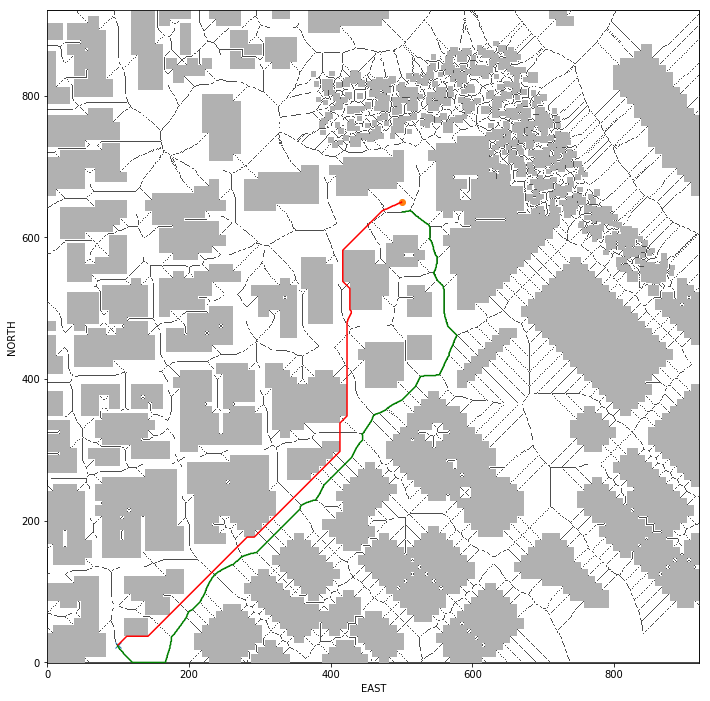

In [ ]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'x')
# Uncomment the following as needed
plt.plot(goal_ne[1], goal_ne[0], 'o')

pp = np.array(path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
pp2 = np.array(path2)
plt.plot(pp2[:, 1], pp2[:, 0], 'r')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Medial-Axis-Solution.ipynb)